In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.02220552,  0.17695722,  0.33647949,  0.49163169,  0.63202316,
        0.74922162,  0.83912903,  0.90206307,  0.94112211,  0.96034342,
        0.96352643,  0.95375103,  0.9333064 ,  0.90378541,  0.86621767,
        0.82118589,  0.76891816,  0.70935625,  0.64220965,  0.56700873,
        0.48317075,  0.39009929,  0.28734344,  0.17484498,  0.05328465,
       -0.07550181, -0.20816538, -0.33978349, -0.46436173, -0.5759452 ,
       -0.66995436, -0.74408585, -0.79836076, -0.83447415, -0.85492909,
       -0.86234403, -0.8590551 , -0.8469581 , -0.82748622, -0.80164975,
       -0.77008945, -0.73312664, -0.69080073, -0.64289522, -0.58895433,
       -0.52829409, -0.46002239, -0.3830792 , -0.29633063, -0.19875565,
       -0.08977892,  0.03021525,  0.15923822,  0.29315606,  0.42569607,
        0.54940462,  0.65741789,  0.74516785,  0.81107044,  0.85602802,
        0.88235128,  0.8927713 ,  0.88982815,  0.87560409,  0.85166794,
        0.81911254,  0.77862537,  0.73055565,  0.67497426,  0.61

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.23743391e-01],
       [  2.00000000e+01,   4.94891286e-01],
       [  3.00000000e+01,   4.98710543e-01],
       [  4.00000000e+01,   4.67874080e-01],
       [  5.00000000e+01,   3.10484111e-01],
       [  6.00000000e+01,   2.22195715e-01],
       [  7.00000000e+01,   1.63801759e-01],
       [  8.00000000e+01,   8.90101269e-02],
       [  9.00000000e+01,   6.87234998e-02],
       [  1.00000000e+02,   5.47289141e-02],
       [  1.10000000e+02,   4.63143401e-02],
       [  1.20000000e+02,   3.39613333e-02],
       [  1.30000000e+02,   3.41295712e-02],
       [  1.40000000e+02,   3.25229391e-02],
       [  1.50000000e+02,   2.56832838e-02],
       [  1.60000000e+02,   2.23396495e-02],
       [  1.70000000e+02,   2.26417109e-02],
       [  1.80000000e+02,   2.08777469e-02],
       [  1.90000000e+02,   1.72339063e-02],
       [  2.00000000e+02,   1.99982319e-02],
       [  2.10000000e+02,   1.35001875e-02],
       [  2.20000000e+02,   1.45024657e-02],
       [  

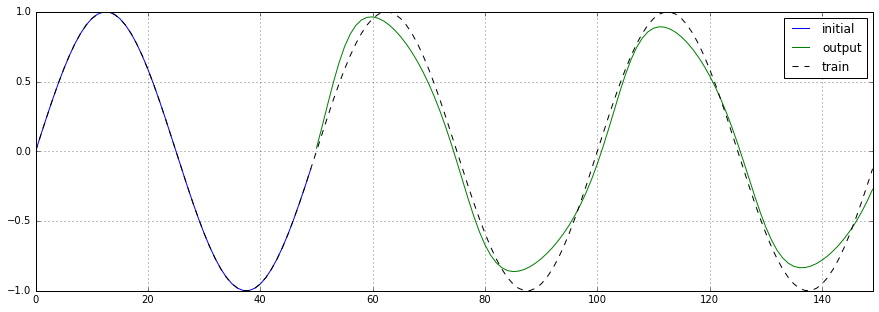

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

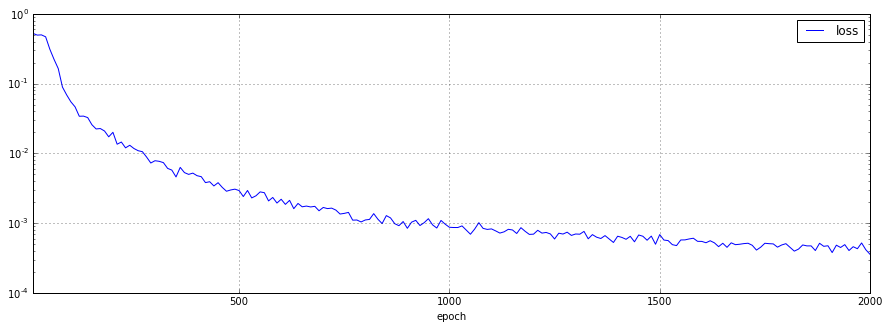

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")